# Utilisation du programme de classification et de masques

## Fichiers nécessaires :
- Les données élémentaires. Il peut s'agir de cartes élémentaires (.bmp ou .tif), mais aussi des cartes des données brutes (.txt) ou encore du cube complet (.raw et du fichier annexe .rpl)

<img src="images/lead_ore_Fe.bmp" width="400" />
Figure 1 : Exemple de carte élémentaire : Fer.

La carte est un fichier de type bitmap (.bmp), c'est-à-dire qu'elle ne contient plus les informations du nombre de coups par énergies. Ellec contient cependant des informations de couleur : 3 nombres entre 0 et 255 par pixels correspondant aux intensités RVB.

- Un tableur constitué d'une colonne Element et de colonnes portant le nom des masques souhaités.

<img src="images/Maskvide.jpg" width="400"/>
Figure 2 : Tableur utilisé pour réalisé la classification

Les éléments indiqués doivent être disponibles sous forme de cartes élementaires dans le dossier.
Un rapport de deux images peut également être introduit : ici F3 et F4 correspondent aux pics de diffusion élastique (Rayleigh diffusion) et diffusion inélastique (Compton).
Une couleur peut également être spécifiée lors de la création de la carte minéralogique complète. Les couleurs spécifiées doivent faire partie de la librairie matplotlib : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

## Les informations à rentrer dans chaque cellule correspondent soit :
- à une valeur comprise entre 0 et 1 si la carte utilisée est un fichier .bmp ou .tif.
- à une valeur correspondant à un nombre de coups si la carte utilisée est un fichier .txt ou .raw (et .rpl associée) et que l'utilisateur souhaite travailler avec les valeurs en nombres de coups. Il peut cependant aussi travailler avec des valeurs comprises entre 0 et 1. 

## Quelles types de valeurs entrer 
- Il peut s'agir d'un seul nombre. Si c'est un nombre à virgule, la séparation se fait par un point.
- Il peut s'agir d'une plage de valeurs ou les deux nombres sont séparés par un tiret (dash).

# Comment utiliser le programme

Dans un premier temps on ouvre un script python, ou une session via un terminal.  Il faut ensuite importer le programme suivant (il doit se trouver dans le même dossier que les cartes élémentaires et que le tableur.

In [1]:
import marcia as mc

Il faut ensuite charger les données. Pour cela on créé un cube de données (3 dimensions) ou les 2 premières dimensions correspondent aux dimensions de l'echantillon (dimensions spatiales) et la troisième dimensions correspond aux informations pour chaque élément disponible. c'est comme si les cartes élémentaires étaient empilées.

In [2]:
data = mc.load('Data/lead_ore','.bmp')

Il faut maintenant charger le tableur :

In [3]:
mask = mc.load_mask('Data/Mask.xlsx')

On obtient ainsi un cube des données élémentaires. Pour retrouver l'index de chaque élément, il suffit d'afficher le dictionnaire des indexations élémentaires correspondantes:

In [4]:
data.elements

{0: 'Al',
 1: 'As',
 2: 'Ca',
 3: 'Cl',
 4: 'Cu',
 5: 'Fe',
 6: 'K',
 7: 'Mg',
 8: 'Mn',
 9: 'Na',
 10: 'Pb',
 11: 'S',
 12: 'Si',
 13: 'Ti'}

Une fois ce cube créé, on peut également afficher la carte élémentaire avec l'histogramme des intensités. Pour obtenir l'histogramme du plomb (élément discriminant de la galène dans notre échantillon), on rentre la commande suivante : 

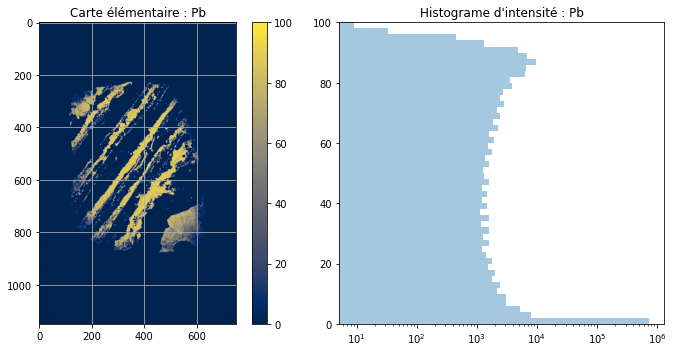

In [5]:
mc.hist(data,'Pb')

In [6]:
mineral_cube = mc.mineralcube_creation(data,mask)

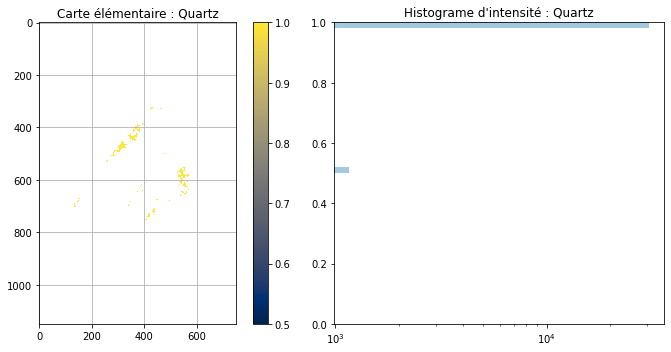

In [7]:
mc.hist(mineral_cube,'Quartz')

On remarque ainsi que dans l'échantillon, il y a une population entre 80% et 100% du pic d'intensité, surement correspondant à la galène. Le pic le plus elevé d'intensité 0 correspond au bruit de fond.

Les données d'entrées étant des images, les intensités calculées sont ainsi normalisées à 100, où 100 correspond au pixel d'intensité maximale de l'élément voulu. En connaissant les formules des minéraux présents, il est possible de caractériser les différentes populations.

La population ayant l'intensité la plus élevée correspond à de la galène (PbS).

Ainsi dans le tableur d'entrée, il est possible de spécifier les valeurs du plomb pour la galène : ici il est difficile de définir une limite basse, on peut ainsi considérer de garder toutes les valeurs au dessus du bruit de fond : 0.05. Si besoin, on pourra affiner cette valeur plus tard dans le tableau.

<img src="images/MaskPb.jpg" width="400"/>

In [8]:
mineral_cube.map()

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [ 3., nan, nan, ..., nan, nan, nan],
        [nan,  3.,  3., ..., nan, nan, nan]]),
 {0: 33.771020502188435,
  1: 1.4633450708087887,
  2: 53.16966685314992,
  3: 11.595967573852855})

Afin de prendre en compte la modification du tableau, on recharge le tableur :

In [9]:
mask.reload()

TypeError: 'NoneType' object is not callable

Maitenant que des valeurs ont été spécifiées pour un minéral, on peut également créer le cube des masques minéralogiques. Il se présente sous la même forme que celui des éléments, mais ne possède que des 1 la où le pixel est associé au minéral, et n'est pas assigné si le pixel n'est pas dans le minéral

In [ ]:
cm.mineralcube_creation()

De même que pour les éléments, il existe un dictionnaire des minéraux permettant de retrouver l'index du minéral dans le cube créé

In [ ]:
cm.Minerals

Etant donné que seul deux minéraux ont été définis pour l'instant dans le classeur, seul deux masques ont rééllement été créés. On peut visualiser chaque masque avec la commande suivante : 
cm.get_mask('nom'). Le nom étant celui défini dans le tableur.

In [ ]:
cm.get_mask('Galene')

Ainsi cm.get_mask('Galene') affiche le masque de la galène

Il est également possible d'afficher la classification minéralogique totale sur une seule image :

In [ ]:
cm.plot_mineral_mask()

L'image ainsi obtenue montre le minéral classifié ainsi que sa proportion. Sont égalements affichés les pixels classés dans plusieurs minéraux et sont appelés mixtes. La somme des proportions des minéraux et des mixtes boucle à 100%. La proportion de pixels non indexés sur toute l'images est également affichés. Ici, cela montre que 87.2% des pixels n'ont pas encore été classés et que sur sur les 12.8% classés, 100% correspondent à de la galène.

En analysant les différents histogrammes des éléments on peut réaliser des seuils pour les autres minéraux et réaliser une classification complète. Un exempel de remplissage du tableur est presenté ci-dessous. Il n'est cependant pas unique et est à l'appréciation de l'utilisateur qui connait son echantillon et sa minéralogie.

<img src="images/Mask.jpg" width="400"/>

Ainsi on recharge le tableur


In [ ]:
cm.load_table()

On recréé les masques correspondants

In [ ]:
cm.mineralcube_creation()

Et on peut afficher la classification finale 

In [ ]:
cm.plot_mineral_mask()

On remarque ainsi que l'échantillon ne prenant pas toute l'image, il y'a beaucoup de pixels non indéxés.
On remarque également qu'il y a 6.38% des pixels classés qui l'ont été plus d'une fois : cela veut dire qu'il est nécessaire de retravailler les seuils afin d'abaisser le plus possible le pourcentage de mixtes.